### 학과: IT미디어공학과
### 학번: 20191035
### 이름 : 장혜림

## Chap 4. 비트코인 시세 예측하기

### <Step1. 탐색> : 시간정보가 포함된 데이터 살펴보기

[1.1] market price 데이터셋의 기본 정보


In [ ]:
# 로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package를 import한다.
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
file_path = files.upload()

Saving market-price.csv to market-price.csv


In [ ]:
# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 데이터프레임을 생성한다.
bitcoin_df = pd.read_csv(io.BytesIO(file_path['market-price.csv']), names = ['day', 'price'])
 
# info()로 데이터의 기초 정보 출력하기
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [ ]:
# 마지막 5개의 데이터를 보여준다
bitcoin_df.tail()

,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


-----

[1.2] 시계열 데이터 살펴보기

In [ ]:
## bitcoin_df 데이터프레임의 'day' 피처를 시계열(날짜) 피처로 변환하시오
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [ ]:
## bitcoin_df 데이터프레임의 'day' 피처를 인덱스로 만드시오.
## 데이터프레임 내부데이터가 변환되록 지정하시오.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index("day", inplace=True)

bitcoin_df.tail()

,price
day,
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714
2018-08-25,6719.429231
2018-08-26,6673.274167


In [ ]:
# price 피처의 기초 통계량을 확인한다.
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


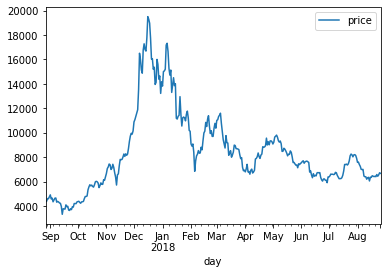

In [ ]:
## bitcoin_df 데이터프레임의 일자별 비트코인 시세를 그래프로 그리시오.
bitcoin_df.plot()
plt.show()

-----

### <Step2. 예측> : 파이썬 라이브러리를 활용한 시세 예측

[2.1] ARIMA 모델 활용하기

* ARIMA 모델 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

## bitcoin_df 데이터프레임의 'price' 피처의 값들로 ARIMA 모델객체를 생성하시오
## (AR=2, 차분=1, MA=2) 파라메터를 지정하시오.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))

#  ARIMA 모델 객체를 훈련시킨다.
# trend='c' 에 의해 절편 지정, c - constant / nc - no constant  
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.074
Method:                       css-mle   S.D. of innovations            501.536
Date:                Fri, 29 Oct 2021   AIC                           5572.148
Time:                        04:15:40   BIC                           5595.531
Sample:                             1   HQIC                          5581.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3951     26.944      0.237      0.813     -46.414      59.204
ar.L1.D.y      0.4496      0.029     15.512      0.000       0.393       0.506
ar.L2.D.y     -0.9622      0.023    -42.314      0.0

-----

### [2.2] 모델의 성능 & 예측 결과 시각화
- 학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화합니다.

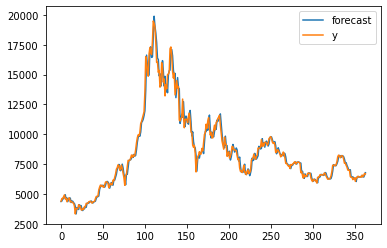

In [ ]:
## 훈련한 모델(model_fit)의 시계열 예측 결과 그래프를 그리시오.

fig = model_fit.plot_predict()

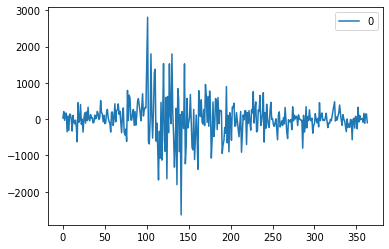

In [ ]:
## 실제값과 예측값 사이의 오차 변동을 나타내는 그래프를 그리시오.
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

### [2.3] 실제 데이터와의 비교
- 예측 결과인 다음 5일의 예측값을 실제 데이터와 비교해본다.


In [ ]:
# 테스트 데이터셋을 불러온다.
test_file_path = files.upload()

Saving market-price-test.csv to market-price-test.csv


In [ ]:
# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 데이터프레임을 생성한다.
bitcoin_test_df = pd.read_csv(io.BytesIO(test_file_path['market-price-test.csv']), names=['ds', 'y'])

# info()로 데이터의 기초 정보 출력하기
print(bitcoin_test_df.shape)
print(bitcoin_test_df.info())

(5, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      5 non-null      object 
 1   y       5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes
None


In [ ]:
# 테스트세트의 데이터를 확인한다.
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [ ]:
## 훈련한 모델(model_fit)로부터 향후 5일 뒤를 예측값을 구하시오.
forecast_data = model_fit.forecast(steps=5)

# 예측 데이터를 확인한다.
print(forecast_data)

(array([6667.3801006 , 6624.5263375 , 6620.60305382, 6669.74828911,
       6705.29388784]), array([ 501.53574487,  731.1161293 ,  905.44113295, 1037.14505156,
       1147.49971646]), array([[5684.38810369, 7650.3720975 ],
       [5191.56505555, 8057.48761945],
       [4845.97104313, 8395.23506452],
       [4636.98134131, 8702.51523692],
       [4456.2357713 , 8954.35200438]]))


In [ ]:
# 다음 5일의 예측 데이터이다.
print(forecast_data[0])

[6667.3801006  6624.5263375  6620.60305382 6669.74828911 6705.29388784]


In [ ]:
# 다음 5일의 예측 데이터의 최소값, 최대값이다.
print(forecast_data[2])

[[5684.38810369 7650.3720975 ]
 [5191.56505555 8057.48761945]
 [4845.97104313 8395.23506452]
 [4636.98134131 8702.51523692]
 [4456.2357713  8954.35200438]]


In [ ]:
## 향후 5일의 예측 데이터를 가지고 있는 forecast_data[0]를 리스트로 변환하시오.
pred_y = forecast_data[0].tolist()

## bitcoin_test_df 데이터프레임의 실제연봉(y) 피처의 값들을 가져오시오.
test_y = bitcoin_test_df.y.values

pred_y_lower = [] # 향후 5일의 예측 데이터의 최소값이다.
pred_y_upper = [] # 향후 5일의 예측 데이터의 최대값이다.

## 예측 데이터의 최소값, 최대값을 각각 리스트에 저장하는 반복문을 만드시오.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

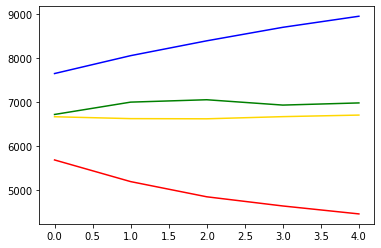

In [ ]:
plt.plot(pred_y, color="gold") ## 모델이 예상한 가격 그래프를 그리시오
plt.plot(pred_y_lower, color="red") ## 모델이 예상한 최소가격 그래프를 그리시오
plt.plot(pred_y_upper, color="blue") ## 모델이 예상한 최대가격 그래프를 그리시오
plt.plot(test_y, color="green") ## 실제 가격 그래프를 그리시오.

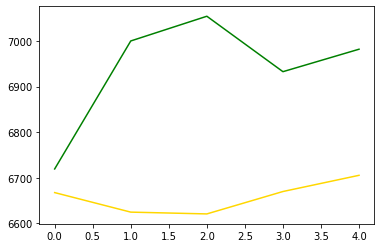

In [ ]:
plt.plot(pred_y, color="gold") ## 모델이 예상한 가격 그래프를 그리시오
plt.plot(test_y, color="green") ## 실제 가격 그래프를 그리시오


-----

In [ ]:
# 평가를 위해 사이킷런 라이브러리를 임포트한다.
from sklearn.metrics import mean_squared_error
from math import sqrt

## 예측값(pred_y)과 실제값(test_y) 차이를 절대적인 수치로 나타낸 RMSE를 구하시오
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

309.0099117445821


-----

### [2.4] Facebook Prophet 활용하기

1. Prophet 모델 학습시키기

In [ ]:
# Facebook Prophet 라이브러리를 설치한다.
!pip install fbprophet

In [ ]:
# Facebook Prophet 라이브러리를 임포트한다.
from fbprophet import Prophet

# market-price.csv 데이터를 다시 읽어온다.
file_path = files.upload()

Saving market-price.csv to market-price (1).csv


In [ ]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야한다.
bitcoin_df = pd.read_csv(io.BytesIO(file_path['market-price.csv']), names=['ds', 'y'])


## Prophet 모델 객체를 생성하시오
## 연간, 월간, 주간, 일간 등의 기간별 트렌드성을 반영하도록 지정하시오.
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True, # 연간
                  weekly_seasonality=True, # 주간
                  daily_seasonality=True, # 일간,
                  changepoint_prior_scale=0.5) # 트렌드가 변경되는 문맥을 반영.

## prophet 모델객체를 bitcoin_df 데이터프레임으로 학습시키시오.
prophet.fit(bitcoin_df)

-----

2. 모델로부터 예측할 기간을 정의하고, 결과를 도출하기

In [ ]:
## prophet 모델객체를 이용하여 향후 5일 뒤의 예측 데이터를 얻기 위한 데이터프레임을 만드시오.
future_data = prophet.make_future_dataframe(periods=5, freq='d')

## prophet 모델객체를 이용하여 future_data 데이트프레임에 대한 예측값을 구하시오.
forecast_data = prophet.predict(future_data)

In [ ]:
# 5일 단위 예측 데이터를 확인한다.
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,595.073916,6207.001164,7513.800104,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6266.304443,7593.748550,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6238.563269,7711.606784,601.176113,601.188190,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6311.349691,7787.190196,601.996060,614.251207,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6289.317346,7967.416873,596.764114,629.161549,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [ ]:
# 날짜, 예측값, 예측 최소값, 예측 최대값만 출력한다.
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6870.046369,6207.001164,7513.800104
366,2018-08-28,6958.173352,6266.304443,7593.748550
367,2018-08-29,6966.981989,6238.563269,7711.606784
368,2018-08-30,7028.094432,6311.349691,7787.190196
369,2018-08-31,7101.738804,6289.317346,7967.416873


3. 예측 결과 시각화하기

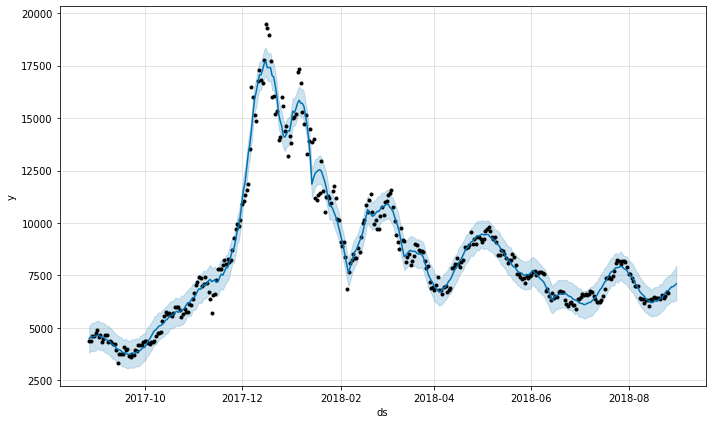

In [ ]:
## prophet 모델객체의 예측결과를 갖고 있는 forecast_data 데이터프레임에 대하여 그래프를 그리시오.
fig1 = prophet.plot(forecast_data)

-----

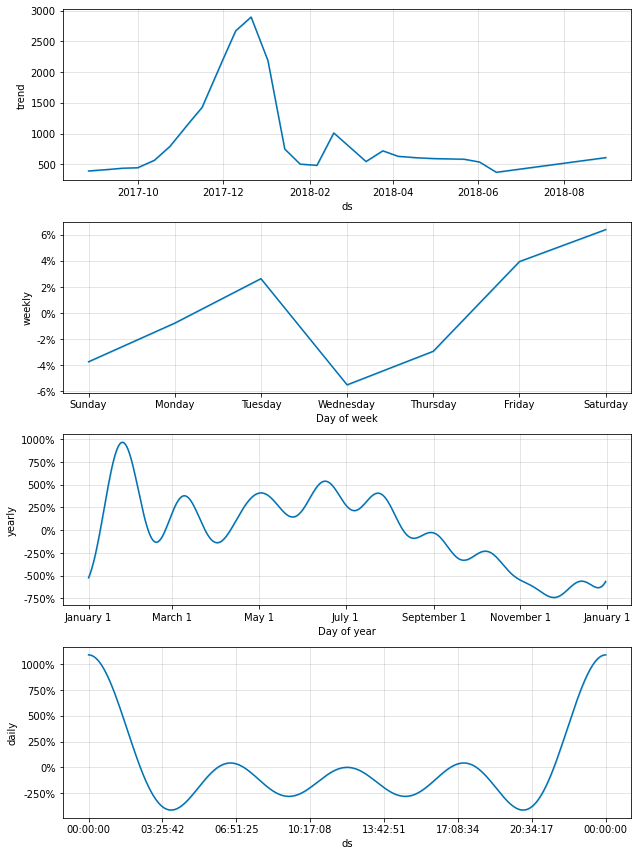

In [ ]:
## prophet 모델객체의 예측결과를 갖고있는 forecast_data 데이터프레임에 대하여 
## 기간별 트렌드 정보를 그래프로 그리시오.
fig2 = prophet.plot_components(forecast_data)

-----

### [2.5] 실제 데이터와의 비교
- 예측 결과인 마지막 5일의 예측값을 실제 데이터와 비교해본다.


In [ ]:
# 테스트 데이터셋을 불러온다.
test_file_path = files.upload()

Saving market-price-test.csv to market-price-test (1).csv


In [ ]:
# read_csv()으로 데이터프레임을 생성한다.
bitcoin_test_df = pd.read_csv(io.BytesIO(test_file_path['market-price-test.csv']), names=['ds', 'y'])

# 테스트 데이터 확인하기
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [ ]:
## forecast_data 데이터프레임의 예측데이터(yhat)의 마지막 5일 값들을 가져오시오
pred_y = forecast_data.yhat.values[-5:]

## bitcoin_test_df 데이터프레임의 실제연봉(y)의 값들을 가져오시오
test_y = bitcoin_test_df.y.values

## forecast_data 데이터프레임의 예측 최소값(yhat_lower)의 마지막 5일 값들을 가져오시오
pred_y_lower = forecast_data.yhat_lower.values[-5:]

## forecast_data 데이터프레임의 예측 최대값(yhat_upper)의 마지막 5일 값들을 가져오시오
pred_y_upper = forecast_data.yhat_upper.values[-5:]

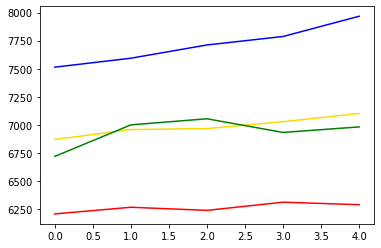

In [ ]:
plt.plot(pred_y, color="gold") ## 모델이 예상한 가격 그래프를 그리시오
plt.plot(pred_y_lower, color="red") ## 모델이 예상한 최소가격 그래프를 그리시오
plt.plot(pred_y_upper, color="blue") ## 모델이 예상한 최대가격 그래프를 그리시오
plt.plot(test_y, color="green") ## 실제 가격 그래프를 그리시오

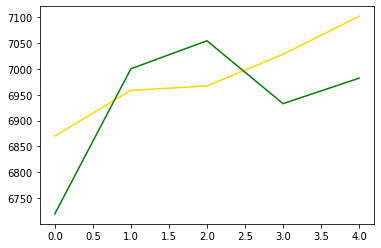

In [ ]:
plt.plot(pred_y, color="gold") ## 모델이 예상한 가격 그래프를 그리시오
plt.plot(test_y, color="green") ## 실제 가격 그래프를 그리시오

-----

In [ ]:
## 예측값(pred_y)과 실제값(test_y) 차이를 절대적인 수치로 나타낸 RMSE를 구하시오
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

105.41853842279897
